Proyek Analisis Data: [[Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)]
Nama: [Salman Fadhilurrohman]
Email: [salmanfr1997@gmail.com]
ID Dicoding: [Salman Fadhilurrohman]

Menentukan Pertanyaan Bisnis
1. Hubungan Antar variable pendukung dalam perubahan jumlah kunjungan(bike rent)
2. Forecasting jumlah pengunjung
3. Anomali Detection jumlah kunjuangan (cnt)
4. Regresi Binomial Negative

Library

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Data Wragling

In [3]:
# Load your dataset
data = pd.read_csv("D:/Dataanalyst/python/baru/latihan/project/hour.csv")

Cleaning data

In [4]:
data = data.dropna(axis=1)


In [5]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [6]:
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Summary Statistics:
 

In [7]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Exploratory Data Analysis (EDA)

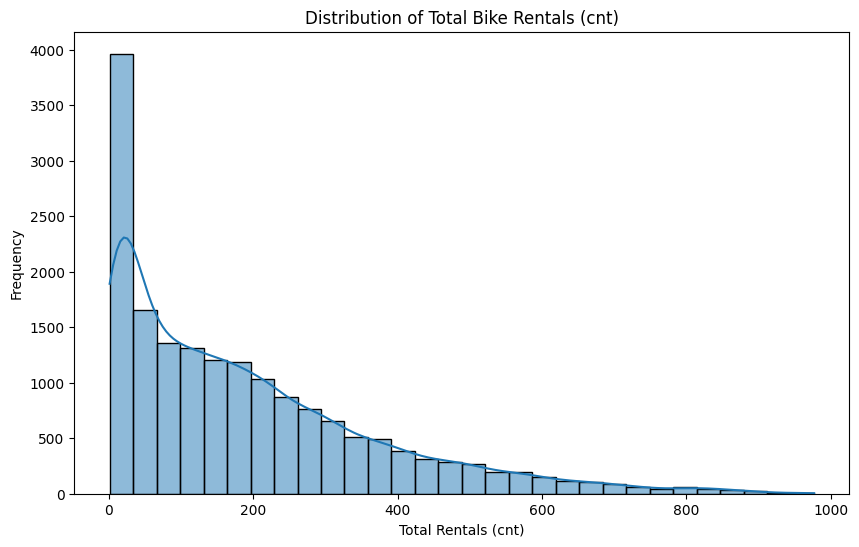

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

In [9]:
data['dteday'] = pd.to_datetime(data['dteday'])

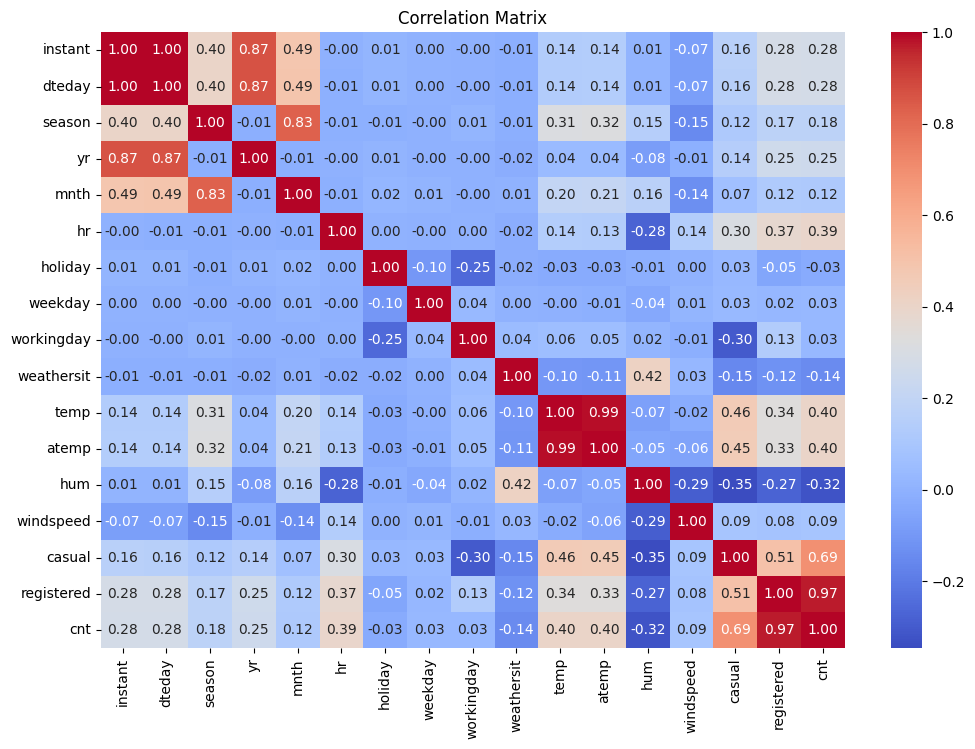

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

dikarenakan mean dan varians berbeda atau variabel cnt lebih besar dari mean, karena variabel cnt merupakan jumlah dua variabel casual dan registered, kemudian penyewaan sepeda dipengaruhi dengan banyak faktor seperti hari, musim, suhu dll, dimana variabilitas besar dalam jumlah penyewaan. Dari penjelasan ini saya mengambil kesimpulan untuk melakukan analisis regresi binomial negatif sehingga memberikan prediksi yang lebih akurat.

C:\Users\salma\AppData\Local\Temp\ipykernel_18140\337652409.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='hr', y='cnt', ci=None)


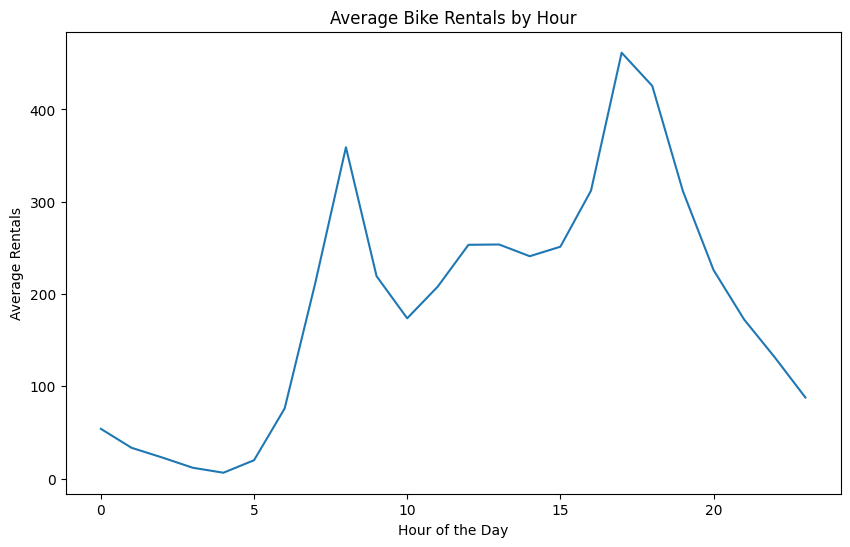

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='hr', y='cnt', ci=None)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.show()

C:\Users\salma\AppData\Local\Temp\ipykernel_18140\3551187576.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='mnth', y='cnt', ci=None)


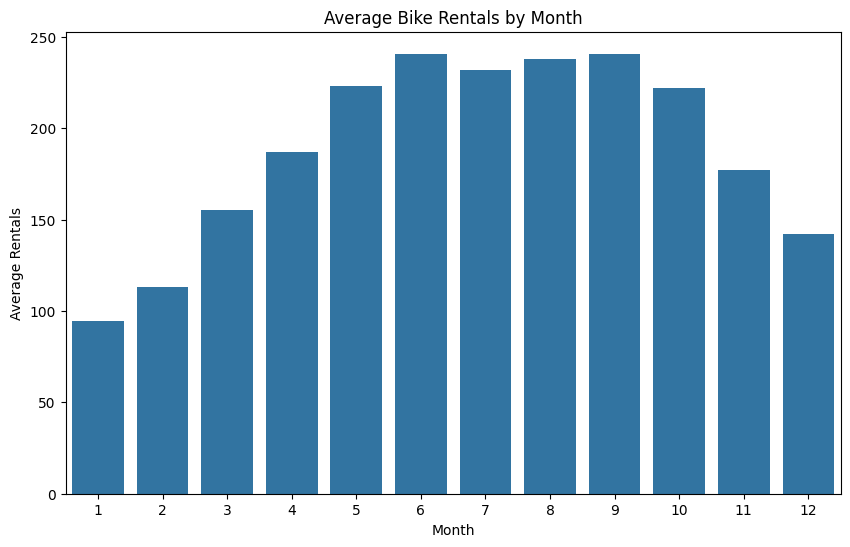

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='mnth', y='cnt', ci=None)
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

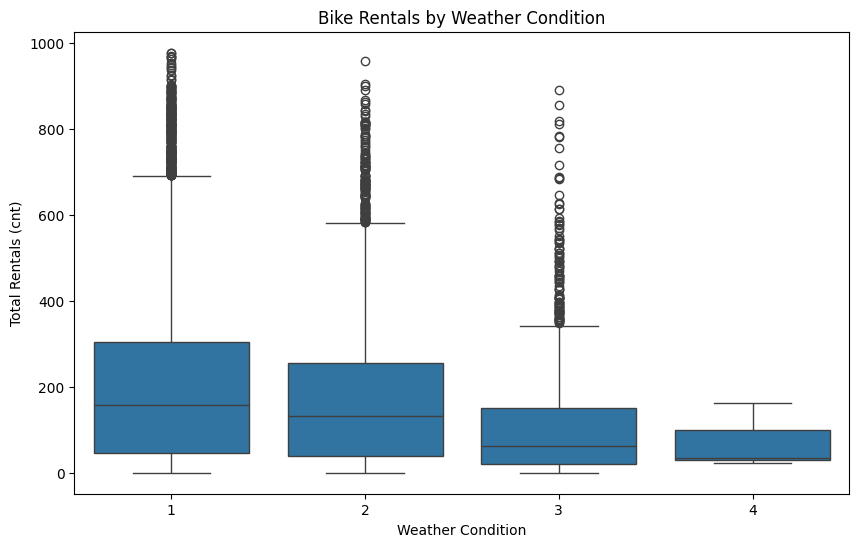

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='weathersit', y='cnt')
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals (cnt)')
plt.show()

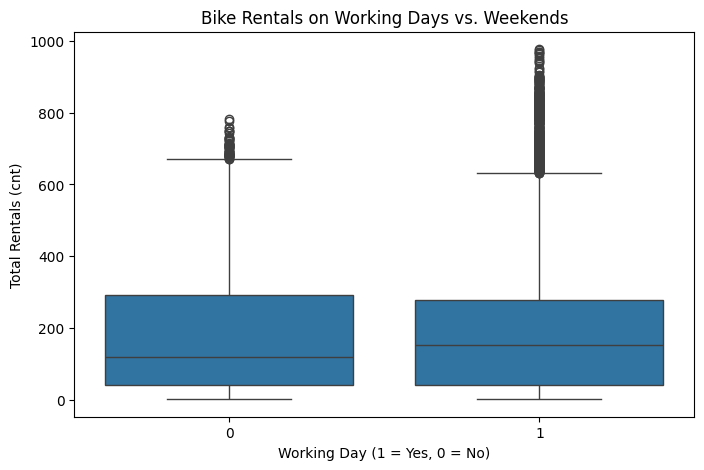

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='workingday', y='cnt')
plt.title('Bike Rentals on Working Days vs. Weekends')
plt.xlabel('Working Day (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

In [15]:
# Convert dteday to datetime
data['dteday'] = pd.to_datetime(data['dteday'])
data.sort_values(by="dteday", inplace=True)
data.reset_index(drop=True, inplace=True)


In [16]:
# Generate daily aggregation without filtering by start and end date
daily_df = data.resample('D', on='dteday').agg({
    'cnt': 'sum'
}).reset_index()

# Rename the aggregated column
daily_df.rename(columns={'cnt': 'total_visitors'}, inplace=True)


In [17]:
daily_df['day_of_week'] = daily_df['dteday'].dt.dayofweek
daily_df['month'] = daily_df['dteday'].dt.month
daily_df['day'] = daily_df['dteday'].dt.day

In [18]:
features = ['day_of_week', 'month', 'day']
target = 'total_visitors'
X = daily_df[features]
y = daily_df[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [20]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [21]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'max_depth': 5,
    'eta': 0.1
}

In [22]:
# Train model
model = xgb.train(params, dtrain, num_boost_round=100)

In [23]:
# Make predictions
y_pred = model.predict(dtest)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [25]:
forecast_days = 30
last_date = daily_df['dteday'].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_days)

In [26]:
future_df = pd.DataFrame({
    'dteday': future_dates,
    'day_of_week': future_dates.dayofweek,
    'month': future_dates.month,
    'day': future_dates.day
})
future_features = future_df[features]
future_dmatrix = xgb.DMatrix(future_features)

In [27]:
future_pred = model.predict(future_dmatrix)
future_df['predicted_visitors'] = future_pred

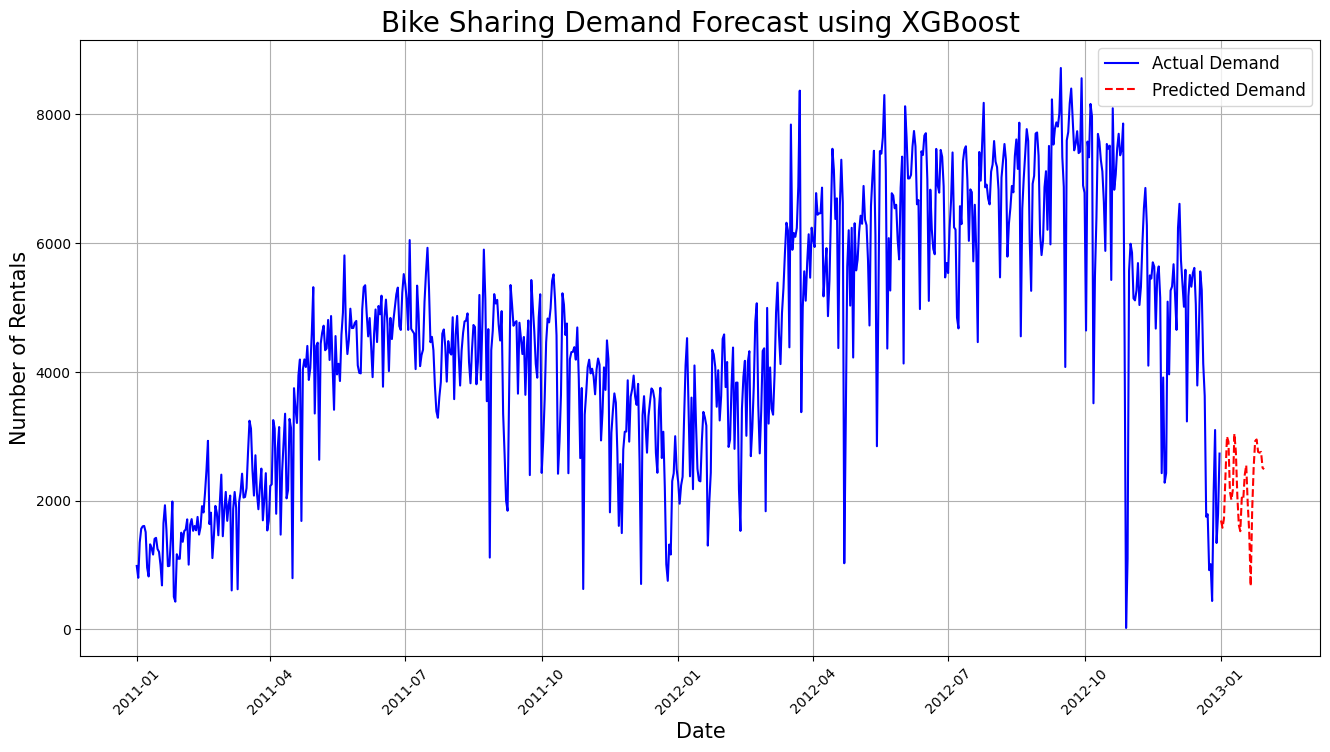

In [28]:
# Plot Bike Sharing Demand Forecast
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(daily_df['dteday'], daily_df['total_visitors'], 
        label='Actual Demand', color='blue')
ax.plot(future_df['dteday'], future_df['predicted_visitors'], 
        label='Predicted Demand', color='red', linestyle='--')
ax.set_title("Bike Sharing Demand Forecast using XGBoost", fontsize=20)
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Number of Rentals", fontsize=15)
ax.legend(fontsize=12)
ax.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [29]:
# Create a DataFrame to display metrics in a table format
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE"],
    "Value": [f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}"]
})

# Display the metrics table
print(metrics_df)

  Metric       Value
0    MAE     2331.73
1    MSE  6752122.38
2   RMSE     2598.48


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [31]:
print(r2)

-0.921382100154331


In [32]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
# Latih model dengan X_train dan y_train
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [35]:
train_size = int(len(daily_df) * 0.7)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [36]:
rf_model = RandomForestRegressor(
    n_estimators=100,  # jumlah trees
    max_depth=10,      # kedalaman maksimum trees
    random_state=42    # untuk reproducibility
)

In [37]:
# Training model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)  # prediksi untuk data test
# atau
y_pred_full = rf_model.predict(X)  # prediksi untuk seluruh dataset

In [39]:
predicted_df = pd.DataFrame({
    'dteday': daily_df['dteday'].iloc[train_size:],  # untuk data test
    'predicted_visitors': y_pred
})

In [40]:
predicted_df_full = pd.DataFrame({
    'dteday': daily_df['dteday'],
    'predicted_visitors': y_pred_full
})

In [41]:
daily_df = pd.merge(daily_df, predicted_df, on='dteday', how='left')

In [42]:
predicted_df = pd.DataFrame({
    'dteday': daily_df['dteday'].iloc[train_size:],
    'predicted_visitors': y_pred
})

In [43]:
print("Shape daily_df:", daily_df.shape)
print("Shape predicted_df:", predicted_df.shape)
print("\nColumns in daily_df:", daily_df.columns)
print("\nColumns in predicted_df:", predicted_df.columns)

Shape daily_df: (731, 6)
Shape predicted_df: (220, 2)

Columns in daily_df: Index(['dteday', 'total_visitors', 'day_of_week', 'month', 'day',
       'predicted_visitors'],
      dtype='object')

Columns in predicted_df: Index(['dteday', 'predicted_visitors'], dtype='object')


In [44]:
print("\nFormat tanggal daily_df:", daily_df['dteday'].dtype)
print("Format tanggal predicted_df:", predicted_df['dteday'].dtype)


Format tanggal daily_df: datetime64[ns]
Format tanggal predicted_df: datetime64[ns]


In [45]:
daily_df_merged = daily_df.copy()  # Buat copy untuk menghindari SettingWithCopyWarning
daily_df_merged = pd.merge(
    daily_df_merged, 
    predicted_df[['dteday', 'predicted_visitors']], 
    on='dteday', 
    how='left'
)

In [46]:
print("\nShape setelah merge:", daily_df_merged.shape)
print("Columns setelah merge:", daily_df_merged.columns)


Shape setelah merge: (731, 7)
Columns setelah merge: Index(['dteday', 'total_visitors', 'day_of_week', 'month', 'day',
       'predicted_visitors_x', 'predicted_visitors_y'],
      dtype='object')


In [47]:
if 'predicted_visitors' in daily_df.columns:
    daily_df = daily_df.drop('predicted_visitors', axis=1)
if 'predicted_visitors_x' in daily_df.columns:
    daily_df = daily_df.drop('predicted_visitors_x', axis=1)
if 'predicted_visitors_y' in daily_df.columns:
    daily_df = daily_df.drop('predicted_visitors_y', axis=1)

In [48]:
predicted_df = pd.DataFrame({
    'dteday': daily_df['dteday'].iloc[train_size:],
    'predicted_visitors': y_pred
})

In [49]:
daily_df_merged = pd.merge(
    daily_df, 
    predicted_df[['dteday', 'predicted_visitors']], 
    on='dteday', 
    how='left'
)

In [50]:
print("Missing values setelah merge:")
print(daily_df_merged.isnull().sum())

Missing values setelah merge:
dteday                  0
total_visitors          0
day_of_week             0
month                   0
day                     0
predicted_visitors    511
dtype: int64


In [51]:
y_pred_full = rf_model.predict(X)

In [52]:
predicted_df = pd.DataFrame({
    'dteday': daily_df['dteday'],  # menggunakan seluruh tanggal
    'predicted_visitors': y_pred_full
})

In [53]:
if 'predicted_visitors' in daily_df.columns:
    daily_df = daily_df.drop('predicted_visitors', axis=1)

In [54]:
daily_df_merged = pd.merge(
    daily_df,
    predicted_df[['dteday', 'predicted_visitors']],
    on='dteday',
    how='left'
)

In [55]:
print("Missing values setelah merge:")
print(daily_df_merged.isnull().sum())

Missing values setelah merge:
dteday                0
total_visitors        0
day_of_week           0
month                 0
day                   0
predicted_visitors    0
dtype: int64


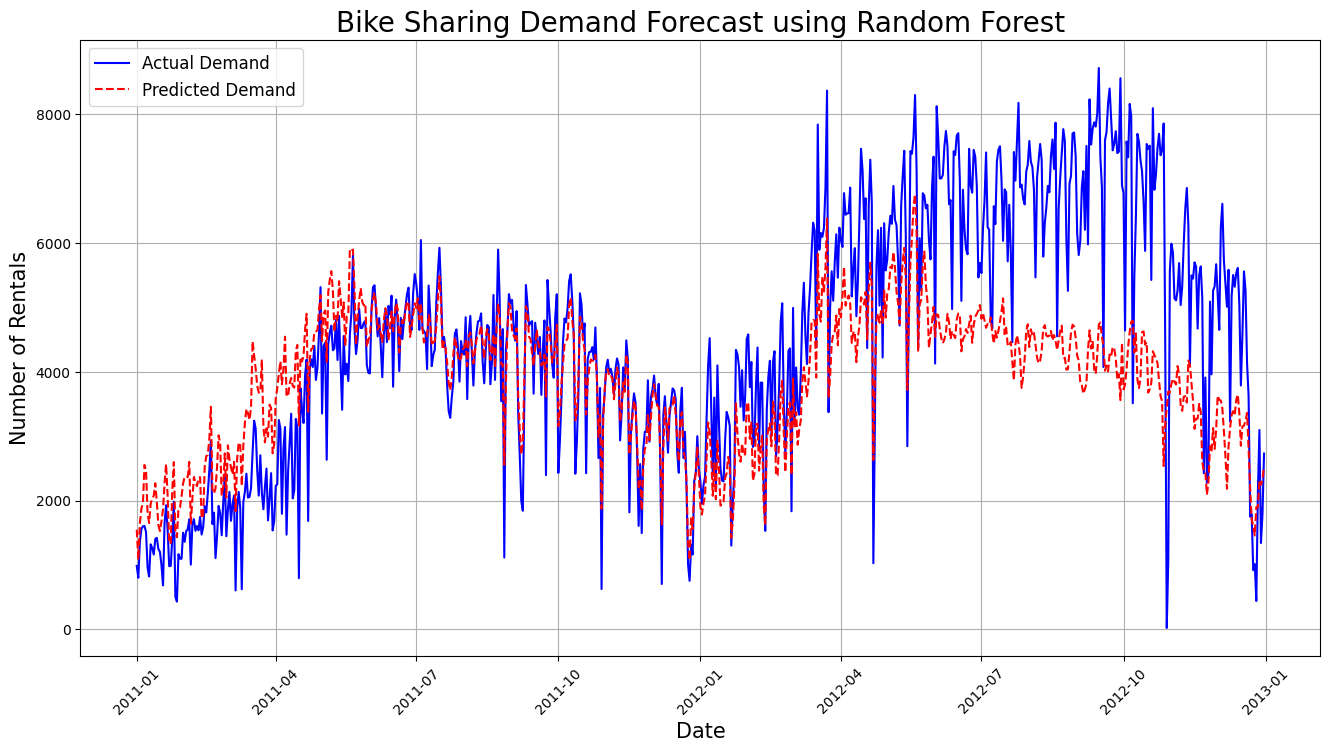

In [56]:
plt.figure(figsize=(16, 8))
plt.plot(daily_df_merged['dteday'], daily_df_merged['total_visitors'], 
         label='Actual Demand', color='blue')
plt.plot(daily_df_merged['dteday'], daily_df_merged['predicted_visitors'], 
         label='Predicted Demand', color='red', linestyle='--')
plt.title("Bike Sharing Demand Forecast using Random Forest", fontsize=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Rentals", fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [57]:
print("\nJumlah data total:", len(daily_df_merged))
print("Jumlah prediksi:", len(y_pred_full))


Jumlah data total: 731
Jumlah prediksi: 731


In [58]:
# Menghitung metrik evaluasi
mae = mean_absolute_error(daily_df_merged['total_visitors'], daily_df_merged['predicted_visitors'])
mse = mean_squared_error(daily_df_merged['total_visitors'], daily_df_merged['predicted_visitors'])
rmse = np.sqrt(mse)
r2 = r2_score(daily_df_merged['total_visitors'], daily_df_merged['predicted_visitors'])

In [59]:
# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((daily_df_merged['total_visitors'] - daily_df_merged['predicted_visitors']) / daily_df_merged['total_visitors'])) * 100

# Membuat DataFrame untuk menampilkan metrik
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R²", "MAPE (%)"],
    "Value": [f"{mae:.2f}", f"{mse:.2f}", f"{rmse:.2f}", f"{r2:.4f}", f"{mape:.2f}"]
})

In [60]:
# Menampilkan metrik
print("\nModel Evaluation Metrics:")
print(metrics_df)


Model Evaluation Metrics:
     Metric       Value
0       MAE     1099.51
1       MSE  2256124.77
2      RMSE     1502.04
3        R²      0.3980
4  MAPE (%)       48.40


In [61]:
def load_and_prepare_data(df):
    """
    Prepare time series data for analysis
    """
    # Convert dteday to datetime
    df['dteday'] = pd.to_datetime(df['dteday'])
    
    # Set dteday as index
    df.set_index('dteday', inplace=True)
    
    # Resample to daily frequency and sum the counts
    daily_rentals = df['cnt'].resample('D').sum()
    
    return daily_rentals

In [62]:
def plot_time_series_components(data):
    """
    Plot time series components to help identify patterns
    """
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot ACF
    plot_acf(data, ax=ax1, lags=40)
    ax1.set_title('Autocorrelation Function')
    
    # Plot PACF
    plot_pacf(data, ax=ax2, lags=40)
    ax2.set_title('Partial Autocorrelation Function')
    
    plt.tight_layout()
    plt.show()

In [63]:
def check_stationarity(timeseries):
    """
    Perform Augmented Dickey-Fuller test and print results
    """
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return dftest[1] < 0.05  # Returns True if stationary

In [64]:
def fit_sarima_model(data, order=(1,1,1), seasonal_order=(1,1,1,12)):
    """
    Fit SARIMA model and return model and predictions
    """
    model = SARIMAX(data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    results = model.fit(disp=0)
    return results

In [65]:
def evaluate_model(y_true, y_pred):
    """
    Calculate performance metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'R-squared Score: {r2:.2f}')
    
    return mse, rmse, mae, r2

In [66]:
def main_analysis(df):
    """
    Main analysis function
    """
    # Prepare data
    data = load_and_prepare_data(df)
    print("\n=== Data Preparation Complete ===")
    
    # Plot time series components
    print("\n=== Plotting Time Series Components ===")
    plot_time_series_components(data)
    
    # Check stationarity
    print("\n=== Checking Stationarity ===")
    is_stationary = check_stationarity(data)
    print(f"\nData is {'stationary' if is_stationary else 'non-stationary'}")
    
    # Fit SARIMA model
    print("\n=== Fitting SARIMA Model ===")
    model_results = fit_sarima_model(data)
    
    print("\n=== Model Summary ===")
    print(model_results.summary())
    
    # Get predictions
    predictions = model_results.get_prediction(start=data.index[0])
    predictions = predictions.predicted_mean
    
    # Evaluate model
    print("\n=== Model Evaluation ===")
    metrics = evaluate_model(data, predictions)
    
    # Plot actual vs predicted
    plt.figure(figsize=(15,6))
    plt.plot(data.index, data, label='Actual')
    plt.plot(predictions.index, predictions, label='Predicted', color='red')
    plt.title('Actual vs Predicted Bike Rentals')
    plt.xlabel('Date')
    plt.ylabel('Number of Rentals')
    plt.legend()
    plt.show()
    
    return model_results, predictions, metrics


=== Data Preparation Complete ===

=== Plotting Time Series Components ===


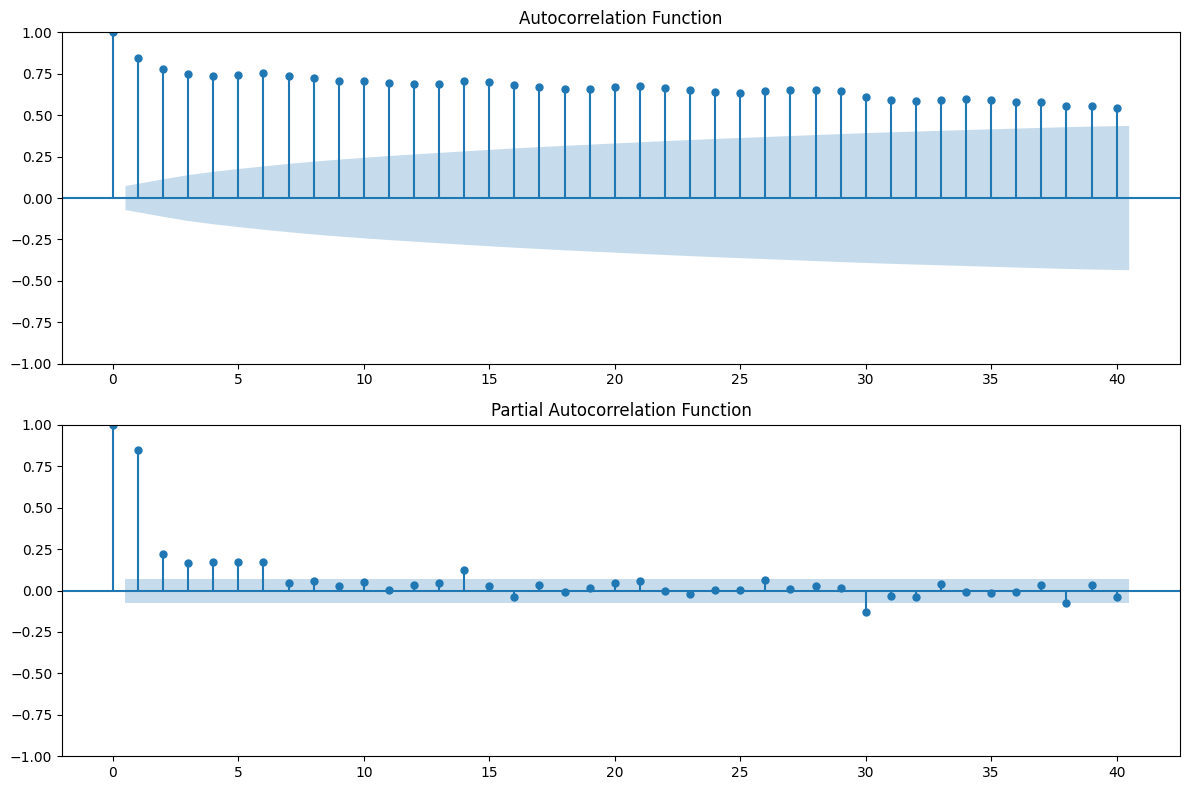


=== Checking Stationarity ===
Results of Dickey-Fuller Test:
Test Statistic                  -1.877448
p-value                          0.342743
#Lags Used                      13.000000
Number of Observations Used    717.000000
Critical Value (1%)             -3.439503
Critical Value (5%)             -2.865579
Critical Value (10%)            -2.568921
dtype: float64

Data is non-stationary

=== Fitting SARIMA Model ===

=== Model Summary ===
                                     SARIMAX Results                                      
Dep. Variable:                                cnt   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5829.884
Date:                            Wed, 13 Nov 2024   AIC                          11669.767
Time:                                    11:34:03   BIC                          11692.551
Sample:                                01-01-2011   HQIC                         11678.572
      

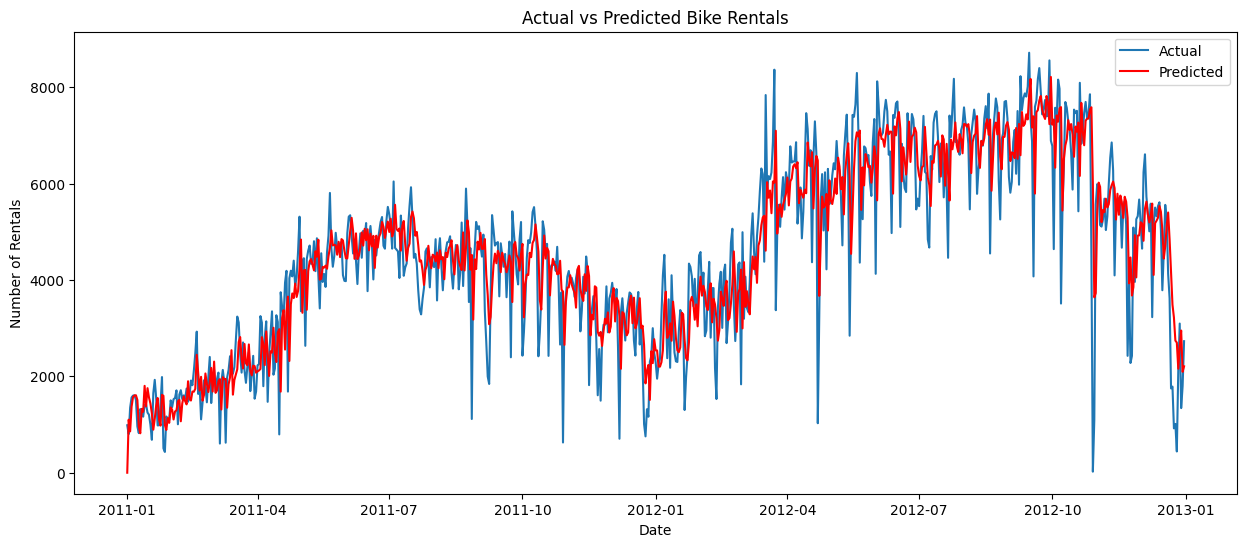

In [67]:
# Jalankan analisis
model_results, predictions, metrics = main_analysis(data)

pakai sarima

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
# Load your dataset
df = pd.read_csv("D:/Dataanalyst/python/baru/latihan/project/hour.csv")

In [70]:
def perform_differencing_analysis(data, column='cnt', max_diff=2):
    """
    Perform differencing analysis on time series data
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input time series data
    column : str
        Column name to analyze
    max_diff : int
        Maximum number of differences to try
    """
    
    # Create figure for plotting
    fig, axes = plt.subplots(max_diff + 1, 2, figsize=(15, 4*(max_diff+1)))
    
    # Original series analysis
    series = df[column].copy()
    result = adfuller(series)
    
    # Plot original series
    axes[0,0].plot(series)
    axes[0,0].set_title(f'Original Series (ADF p-value: {result[1]:.4f})')
    axes[0,0].set_xlabel('Time')
    axes[0,0].set_ylabel('Value')
    
    # Plot ACF of original series
    pd.plotting.autocorrelation_plot(series, ax=axes[0,1])
    axes[0,1].set_title('ACF of Original Series')
    
    # Perform differencing
    for d in range(1, max_diff + 1):
        # Calculate difference
        diff_series = series.diff(d).dropna()
        result = adfuller(diff_series)
        
        # Plot differenced series
        axes[d,0].plot(diff_series)
        axes[d,0].set_title(f'{d}-Order Difference (ADF p-value: {result[1]:.4f})')
        axes[d,0].set_xlabel('Time')
        axes[d,0].set_ylabel('Value')
        
        # Plot ACF of differenced series
        pd.plotting.autocorrelation_plot(diff_series, ax=axes[d,1])
        axes[d,1].set_title(f'ACF of {d}-Order Difference')
    
    plt.tight_layout()
    return fig


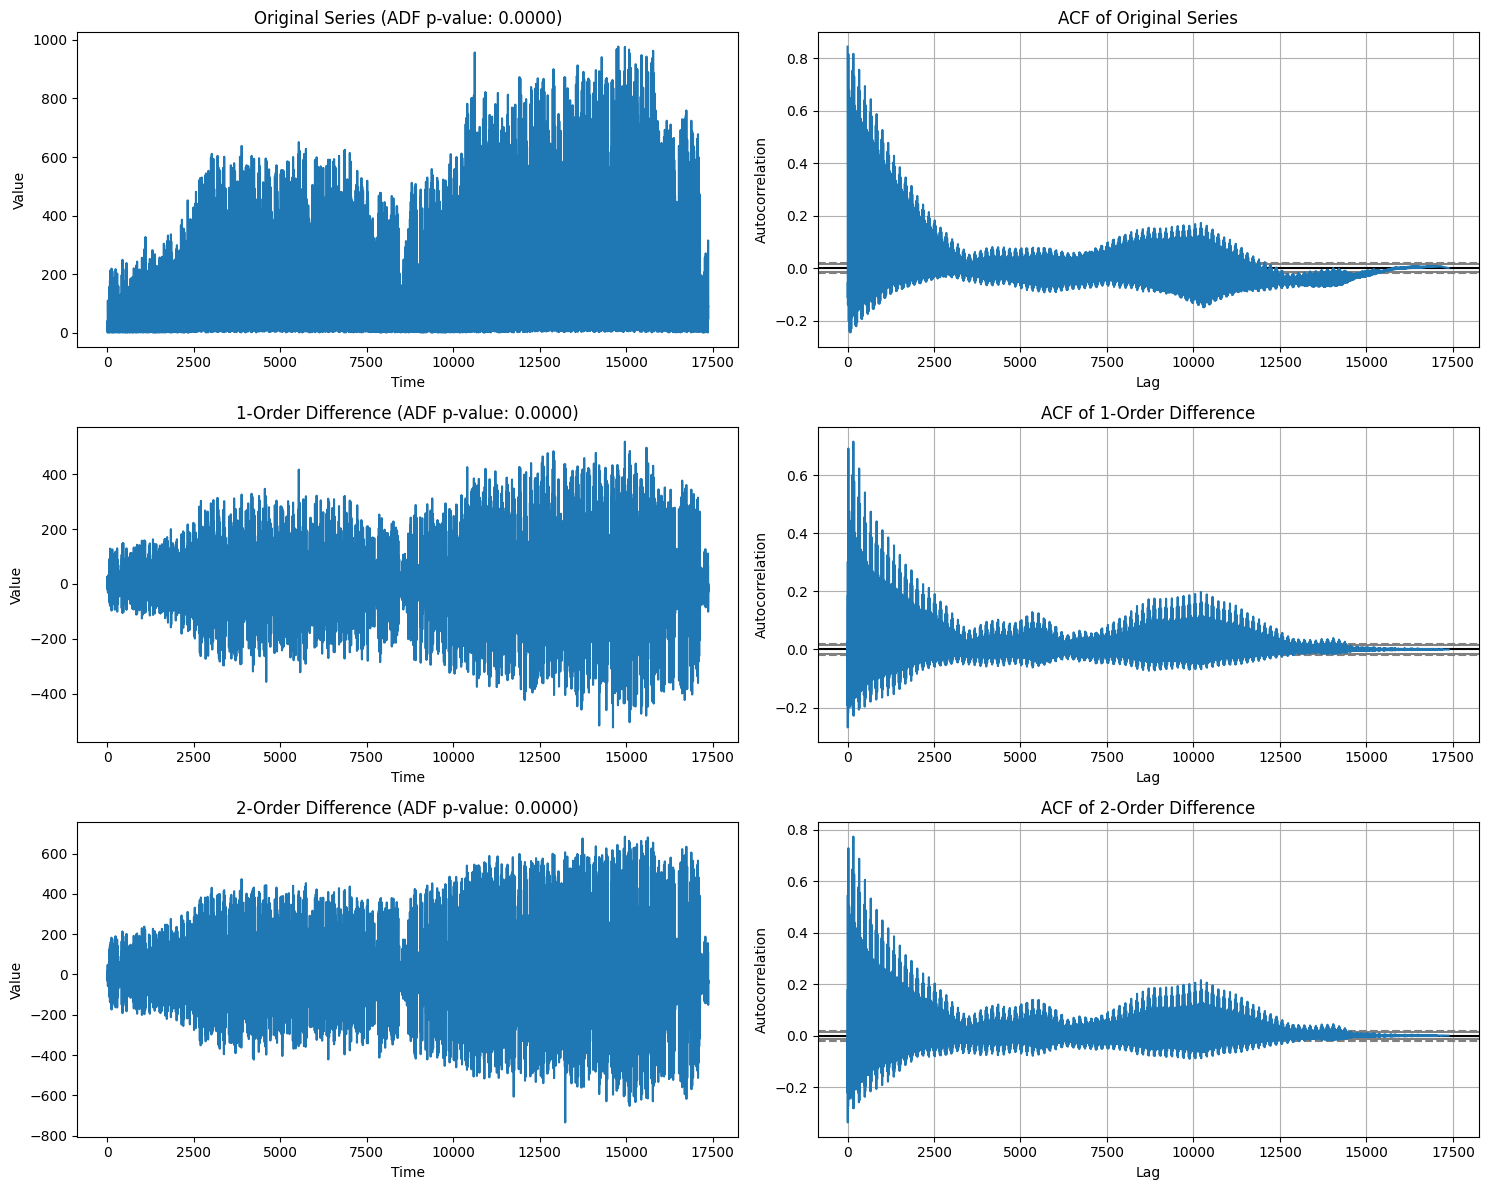

In [71]:
fig = perform_differencing_analysis(data)
plt.show()

In [72]:
print("\nStationarity Tests (ADF):")
series = df['cnt']
for d in range(3):
    if d == 0:
        result = adfuller(series)
        print(f"\nOriginal Series:")
    else:
        result = adfuller(series.diff(d).dropna())
        print(f"\n{d}-Order Difference:")
    
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')


Stationarity Tests (ADF):

Original Series:
ADF Statistic: -6.8229
p-value: 0.0000
Critical values:
	1%: -3.4307
	5%: -2.8617
	10%: -2.5669

1-Order Difference:
ADF Statistic: -30.0916
p-value: 0.0000
Critical values:
	1%: -3.4307
	5%: -2.8617
	10%: -2.5669

2-Order Difference:
ADF Statistic: -30.4155
p-value: 0.0000
Critical values:
	1%: -3.4307
	5%: -2.8617
	10%: -2.5669


In [73]:
# Contoh parameter SARIMA, disesuaikan dengan data musiman Anda (misal s=12 untuk data musiman tahunan)
model = SARIMAX(df['cnt'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

In [74]:
# Model Summary
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                cnt   No. Observations:                17379
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood             -100985.955
Date:                            Wed, 13 Nov 2024   AIC                         201981.911
Time:                                    11:34:46   BIC                         202020.722
Sample:                                         0   HQIC                        201994.696
                                          - 17379                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7060      0.005    143.938      0.000       0.696       0.716
ma.L1          0.5085      0.007   

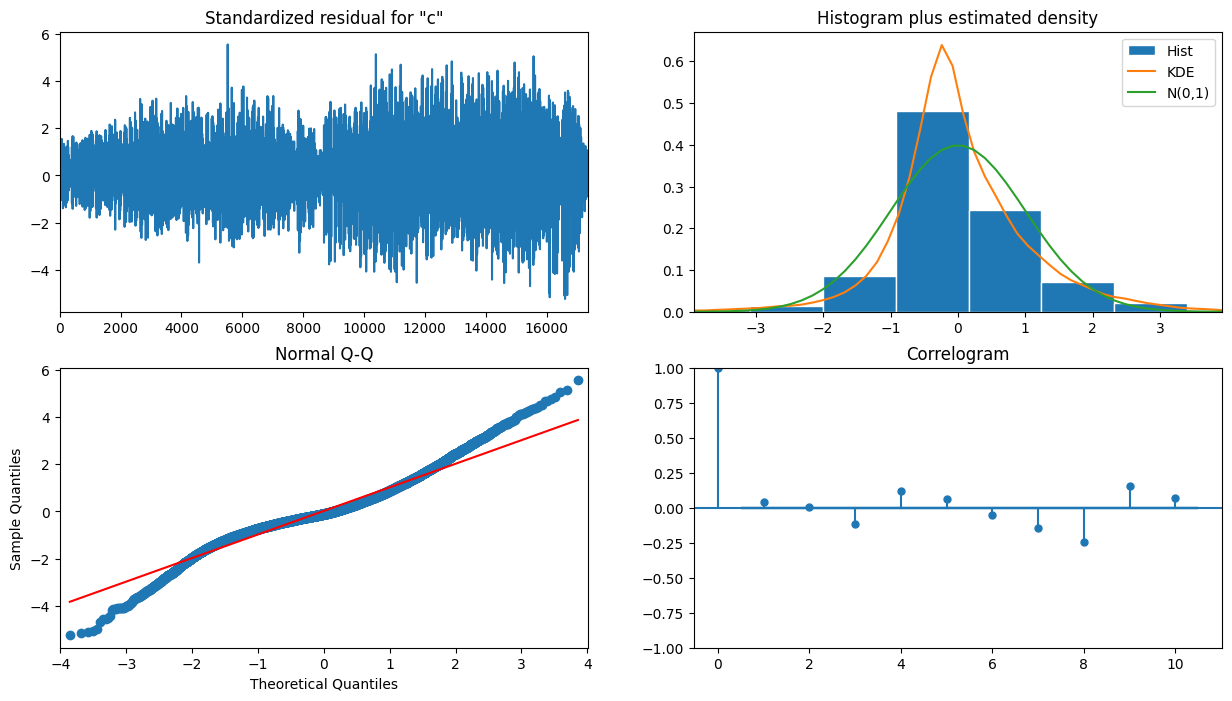

In [75]:
# Plot diagnostik
sarima_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

In [76]:
forecast_steps = 12
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [77]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


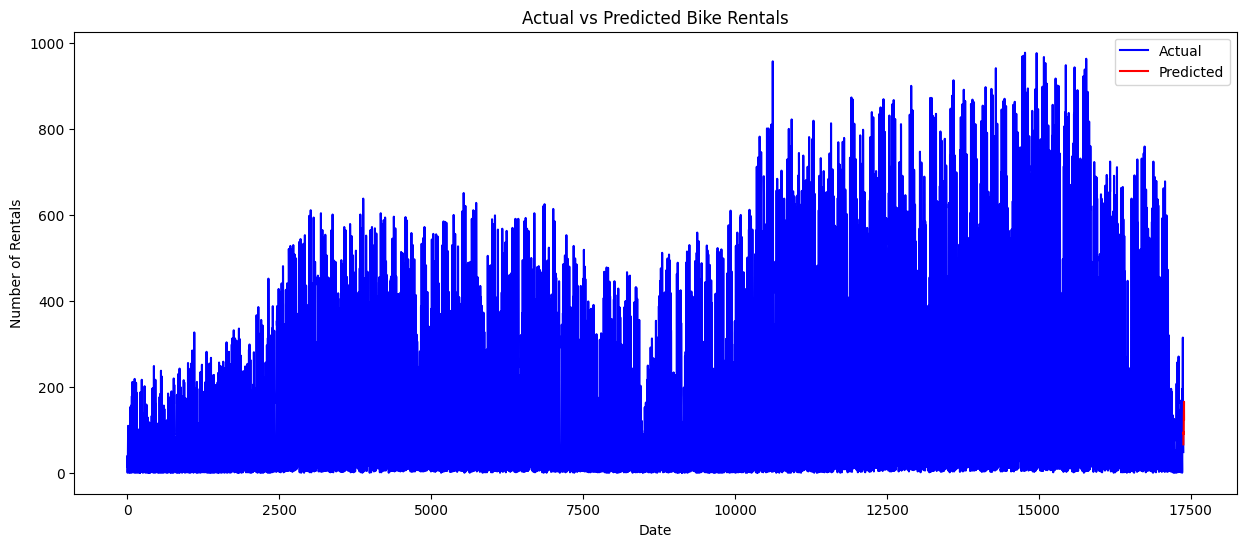

In [78]:
# Plot actual vs predicted bike rentals
plt.figure(figsize=(15, 6))

# Plot observed data
plt.plot(df.index, df['cnt'], label='Actual', color='blue')

# Plot forecast data
plt.plot(forecast_mean.index, forecast_mean, label='Predicted', color='red')

# Title and labels
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')

# Legend
plt.legend()

# Show the plot
plt.show()


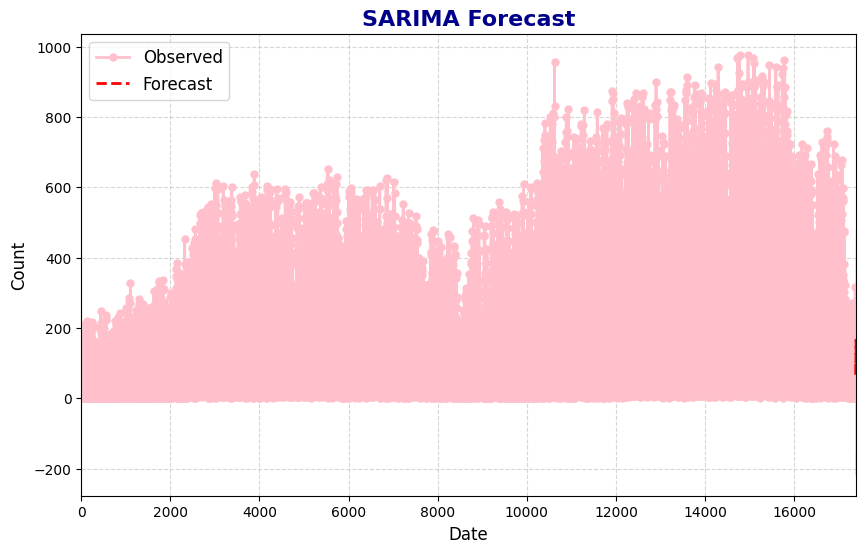

In [79]:
# Plot observed data
plt.figure(figsize=(10, 6))
plt.plot(df['cnt'], label='Observed', color='pink', linestyle='-', marker='o', markersize=5, linewidth=2)

# Plot forecast data, ensure it is within the visible range and check alignment
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red', linestyle='--', linewidth=2)

# Add shaded confidence interval with adjusted alpha for better visibility
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='blue', alpha=0.2)

# Add gridlines with light style
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels and title with custom font sizes
plt.title("SARIMA Forecast", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize the legend with a better position and style
plt.legend(loc='upper left', fontsize=12, fancybox=True, framealpha=0.8)

# Adjust limits if necessary (in case forecast is out of range)
plt.xlim(min(df.index.min(), forecast_mean.index.min()), max(df.index.max(), forecast_mean.index.max()))

# Show the plot
plt.show()

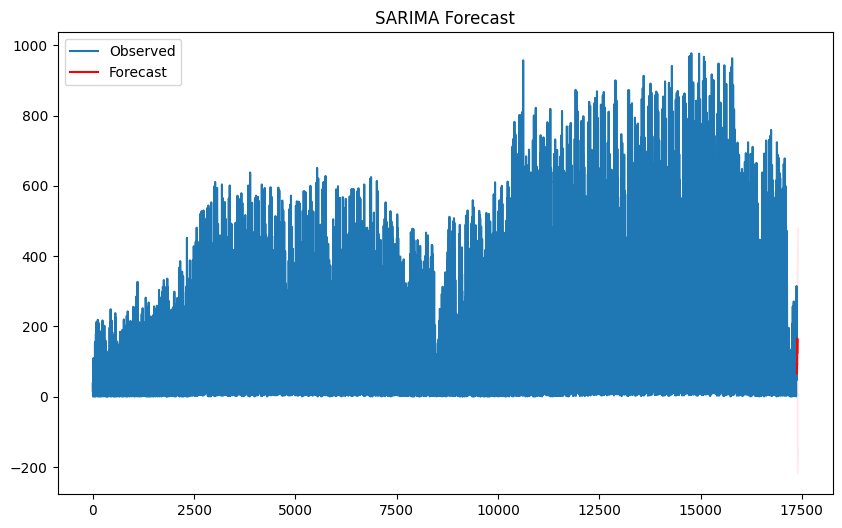

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(df['cnt'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast")
plt.show()

In [81]:
actual = df['cnt'][-forecast_steps:]
predicted = forecast_mean

In [82]:
print(predicted)

17379     66.897656
17380     79.038659
17381     92.517571
17382     95.253588
17383     90.656667
17384     95.067155
17385    108.167805
17386    131.448532
17387    143.602485
17388    145.156300
17389    165.770773
17390    125.304562
Name: predicted_mean, dtype: float64


In [83]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

In [84]:
print("=== Forecast Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

=== Forecast Evaluation ===
Mean Absolute Error (MAE): 97.06
Mean Squared Error (MSE): 12944.62
Root Mean Squared Error (RMSE): 113.77


In [81]:
# Reset the index to make 'dteday' a column
data.reset_index(inplace=True)

In [91]:
print(data)

            instant  season  yr  mnth  hr  holiday  weekday  workingday  \
dteday                                                                    
2011-01-01        1       1   0     1   0        0        6           0   
2011-01-01       24       1   0     1  23        0        6           0   
2011-01-01       23       1   0     1  22        0        6           0   
2011-01-01       22       1   0     1  21        0        6           0   
2011-01-01       21       1   0     1  20        0        6           0   
...             ...     ...  ..   ...  ..      ...      ...         ...   
2012-12-31    17357       1   1    12   1        0        1           1   
2012-12-31    17356       1   1    12   0        0        1           1   
2012-12-31    17378       1   1    12  22        0        1           1   
2012-12-31    17366       1   1    12  10        0        1           1   
2012-12-31    17379       1   1    12  23        0        1           1   

            weathersit  

In [84]:
# Convert index to datetime if needed
data.index = pd.to_datetime(data.index)


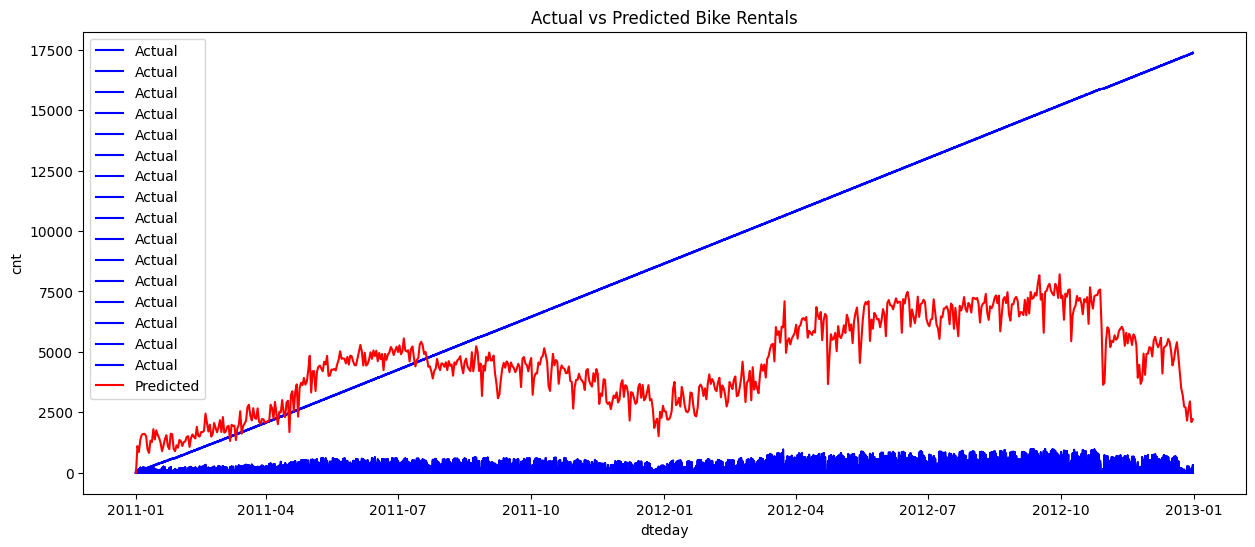

In [90]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data, label='Actual', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('dteday')
plt.ylabel('cnt')
plt.legend()
plt.show()


In [87]:
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

In [88]:
print("=== Forecast Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

=== Forecast Evaluation ===
Mean Absolute Error (MAE): 97.06
Mean Squared Error (MSE): 12944.62
Root Mean Squared Error (RMSE): 113.77


peramalan pakai sarima karena data mengandung seasonal, dan nilai evaluasi lebih bagus dibanding dengan xgboost dan random forest